Task 1a)

In [4]:
#computes A*B=C and returns matrix C
def matrix_multiplication(A,B,i):
    C = [[0 for _ in range(i)] for _ in range(i)] #creates an empty matrix, size i
    for col in range(i):
        for row in range(i):
            for row_element in range(i):
                C[col][row]+=A[row][row_element]*B[row_element][col] 

Task 1b)


In [ ]:
import random
import time

def benchmark_custom_implementation():
    times_list=[]#list to save all the time calculations
    for i in range(50,401,50):#creates 2 matrices up to 1000 dimensions, always with 50s steps
        A= [[random.randint(0, 100) for _ in range(i)] for _ in range(i)]#List Comprehension: The outer loop creates i rows and the inner loop for i elements a random number 
        B= [[random.randint(0, 100) for _ in range(i)] for _ in range(i)]

        start_time= time.time() #measures the time before the multiplication
        matrix_multiplication(A,B,i)#creates the matrice C=A*B
        end_time = time.time() #measures the time after the multiplication

        runtime= end_time - start_time
        times_list.append(runtime) #appends the times_list with the time

        print(f"Matrix size {i}x{i}: {runtime:.5f} seconds ") #prints the time for each matrix
         
    return times_list
        
runtimes = benchmark_custom_implementation()

Analyze and benchmark the runtime: 

Here is the output of the programm.(I wasn't able to compute all matrices because my computer would shut down.)



Matrix size 50x50: 0.02185 seconds 
Matrix size 100x100: 0.20401 seconds 
Matrix size 150x150: 0.60193 seconds 
Matrix size 200x200: 1.69854 seconds 
Matrix size 250x250: 2.87774 seconds 
Matrix size 300x300: 5.64738 seconds 
Matrix size 350x350: 9.06278 seconds 
Matrix size 400x400: 14.62562 seconds 
Matrix size 450x450: 22.70375 seconds

We can see, that the matrix multiplication takes much more time, the bigger the  matrix is. 
From a 50x50 matrix to a 100x100 matrix the runtime increases nearly 10x. From the 100x100 to a 200x200 matrix the time increases about 8x. 

Task 1c)


Matrix size 50x50: 0.02356 seconds 
Matrix size 100x100: 0.17926 seconds 
Matrix size 150x150: 0.60656 seconds 
Matrix size 200x200: 1.64472 seconds 
Matrix size 250x250: 3.11268 seconds 
Matrix size 300x300: 5.44044 seconds 
Matrix size 350x350: 8.99555 seconds 
Matrix size 400x400: 14.16178 seconds 
Matrix size 50x50 with numpy: 0.00011 seconds 
Matrix size 100x100 with numpy: 0.00096 seconds 
Matrix size 150x150 with numpy: 0.00325 seconds 
Matrix size 200x200 with numpy: 0.00818 seconds 
Matrix size 250x250 with numpy: 0.01540 seconds 
Matrix size 300x300 with numpy: 0.02708 seconds 
Matrix size 350x350 with numpy: 0.04214 seconds 
Matrix size 400x400 with numpy: 0.08717 seconds 


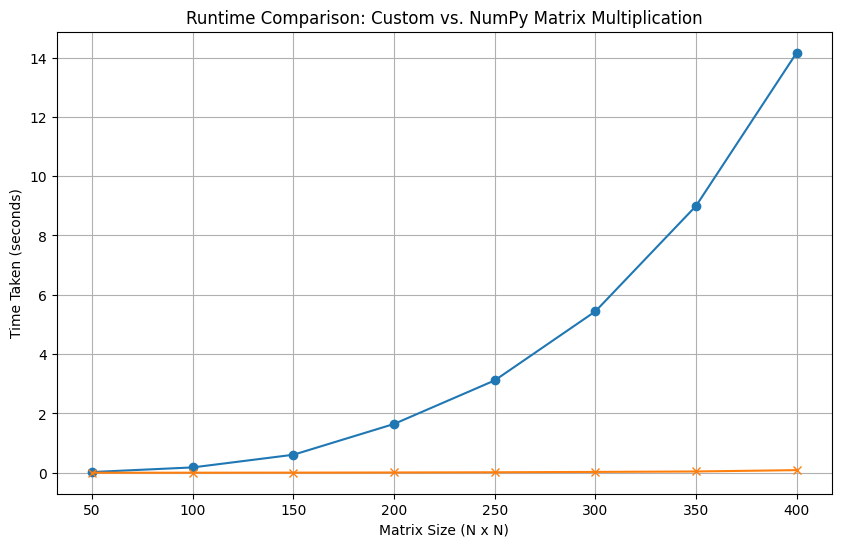

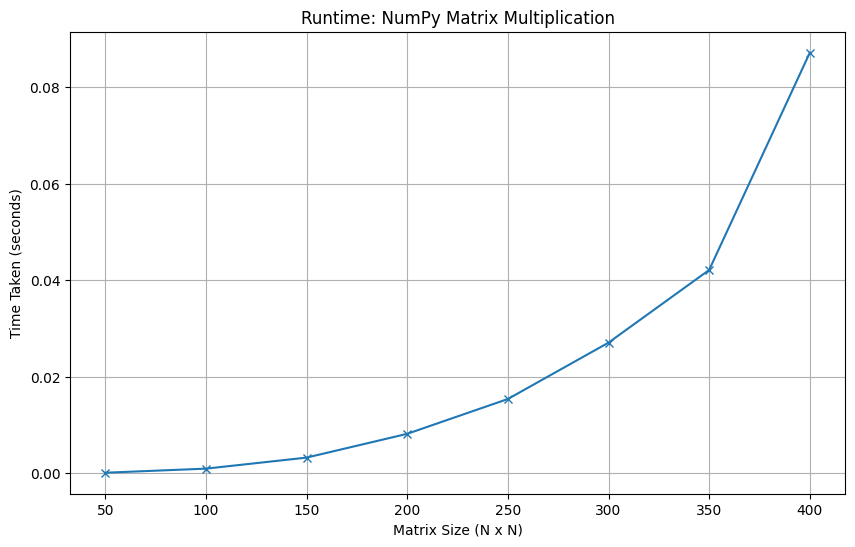

In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt

def benchmark_numpy_implementation():
    times_list=[]#list to save all the time calculations
    for i in range(50,401,50):#creates 2 matrices up to 1000 dimensions, always with 50s steps
        A = np.random.randint(0, 100, (i, i)) #creates random matrix in the size of ixi
        B = np.random.randint(0, 100, (i, i))

        start_time= time.time() #measures the time before the multiplication
        np.dot(A, B) #matrix multiplication with numpy
        end_time = time.time() #measures the time after the multiplication

        runtime= end_time - start_time
        times_list.append(runtime) #appends the times_list with the time

        print(f"Matrix size {i}x{i} with numpy: {runtime:.5f} seconds ") #prints the time for each matrix
         
    return times_list
        
custom_runtimes = benchmark_custom_implementation() 
numpy_runtimes = benchmark_numpy_implementation()

#i put a link in my source directory, where i got this functions from!

plt.figure(figsize=(10, 6)) #creates figure 
plt.plot(range(50, 401, 50), custom_runtimes, label="Custom Implementation", marker='o') #plot creates a line in the diagramm and takes every size of the matrix and the time to compute
plt.plot(range(50, 401, 50), numpy_runtimes, label="NumPy Implementation", marker='x')
plt.xlabel("Matrix Size (N x N)") 
plt.ylabel("Time Taken (seconds)")
plt.title("Runtime Comparison: Custom vs. NumPy Matrix Multiplication") 
plt.grid(True) #creates a raster in the diagramm for a more readable diagramm
plt.show() #shows the diagramm

plt.figure(figsize=(10, 6)) #creates figure 
plt.plot(range(50, 401, 50), numpy_runtimes, label="NumPy Implementation", marker='x')
plt.xlabel("Matrix Size (N x N)") 
plt.ylabel("Time Taken (seconds)")
plt.title("Runtime: NumPy Matrix Multiplication") 
plt.grid(True) #creates a raster in the diagramm for a more readable diagramm
plt.show() #shows the diagramm

Task 1d)

In the diagram, we obtain, that the pre built matrix multiplication works way more faster. For the multiplication of two 400x400 matrices my own implementation takes 15.83369 seconds and the built-in matrix multiplication from numpy takes 0.11230 seconds - about 140 times faster.

My implementation and the numpy calculation have the time complexity of O(n^3). My algorithm has to run through nxnxn operations. This shows in the matrixmultiplication function: it uses 3 loops to compute C. This cubic time complexity means, that the time increases very fast.

When we look at the runtime curve of the numpy multiplication, we can see, that it grows similar as my algorithm, but a much slower rate. Numpy is a optimized multiplication and is way faster because of the optimation. 

Task 1e)

Without recursion: 

In [21]:
import random


def strassen_No_recursion(A,B): 
    C = [[0, 0], [0, 0]]
    #the 4 values from matrix A
    a11= A[0][0]
    a12= A[0][1]
    a21= A[1][0]
    a22= A[1][1]

    b11= B[0][0]
    b12= B[0][1]
    b21= B[1][0]
    b22= B[1][1]

    p1=(a11+a22)*(b11+b22)
    p2=(a21+a22)*b11
    p3=(a11*(b12-b22))
    p4= a22*(b21-b11)
    p5=(a11+a12)*b22
    p6=(a21-a11)*(b11+b12)
    p7=(a12-a22)*(b21+b22)

    C[0][0] = p5+p4-p2+p6
    C[0][1] = p1+p2
    C[1][0] = p3+p4
    C[1][1] = p1+p5-p3-p7

    return C

Matrix A= [[59, 56], [36, 85]]
Matrix B= [[55, 51], [92, 92]]
Matrix C= [[8397, 8161], [9800, 9656]]


With recursion

In [42]:
#adds the two elements
def add_matrices(a,b):
    result=[a[0]+b[0]]
    return result

#subtracts the two elements
def subtract_matrices(a,b):
    result=[a[0]-b[0]]
    return result

def strassen_with_recursion(A,B):
    #create a new 2x2 matrix 
    C = [[0, 0], [0, 0]]
    
    #checks if the length of A in the current function is only one element, if so it calculates the values
    if len(A) == 1:
        return A[0] * B[0]
    
    a11= A[0][0]
    a12= A[0][1]
    a21= A[1][0]
    a22= A[1][1]

    b11= B[0][0]
    b12= B[0][1]
    b21= B[1][0]
    b22= B[1][1]

    # here the recursion takes place: 
    p1=strassen_with_recursion(add_matrices([a11], [a22]), add_matrices([b11], [b22])) #no recursion: (a11+a22)*(b11+b22)
    p2=strassen_with_recursion(add_matrices([a21], [a22]), [b11]) # no recursion:(a21+a22)*b11
    p3=strassen_with_recursion([a11], subtract_matrices([b12], [b22])) # no recursion: a11*(b12-b22)
    p4=strassen_with_recursion([a22], subtract_matrices([b21], [b11])) # no recursion: a22*(b21-b11)
    p5=strassen_with_recursion(add_matrices([a11], [a12]), [b22]) # no recursion: (a11+a12)*b22
    p6=strassen_with_recursion(subtract_matrices([a21], [a11]), add_matrices([b11], [b12])) # no recursion: (a21-a11)*(b11+b12)
    p7=strassen_with_recursion(subtract_matrices([a12], [a22]), add_matrices([b21], [b22])) # no recursion: (a12-a22)*(b21+b22)

    C[0][0] = p5+p4-p2+p6
    C[0][1] = p1+p2
    C[1][0] = p3+p4
    C[1][1] = p1+p5-p3-p7

    return C

A=[[random.randint(0, 100) for _ in range(2)] for _ in range(2)]
print(f'Matrix A= {A}')
B=[[random.randint(0, 100) for _ in range(2)] for _ in range(2)]
print(f'Matrix B= {B}')

start_time= time.time() #measures the time before the multiplication
S= strassen_with_recursion(A,B)
end_time= time.time() #measures the time before the multiplication
Time_no_recursion= end_time-start_time

print(f'Matrix C= {S}')


start_time= time.time() #measures the time before the multiplication
S= strassen_No_recursion(A,B)
end_time= time.time() #measures the time before the multiplication
Time_with_recursion= end_time-start_time
print(f'Time without recursion: {Time_no_recursion} \nTime with recursion: {Time_with_recursion}')



Matrix A= [[48, 10], [7, 41]]
Matrix B= [[55, 60], [38, 49]]
Matrix C= [[-5210, 11896], [-169, 14267]]
Time without recursion: 0.00011396408081054688 
Time with recursion: 0.0002818107604980469


runtime naive multiplication: 5.4478645324707035e-06
runtime numpy multiplication: 2.00808048248291e-05
runtime strassen (no recursion) multiplication: 7.534027099609375e-06
runtime strassen (recursion) multiplication: 1.9818544387817383e-05


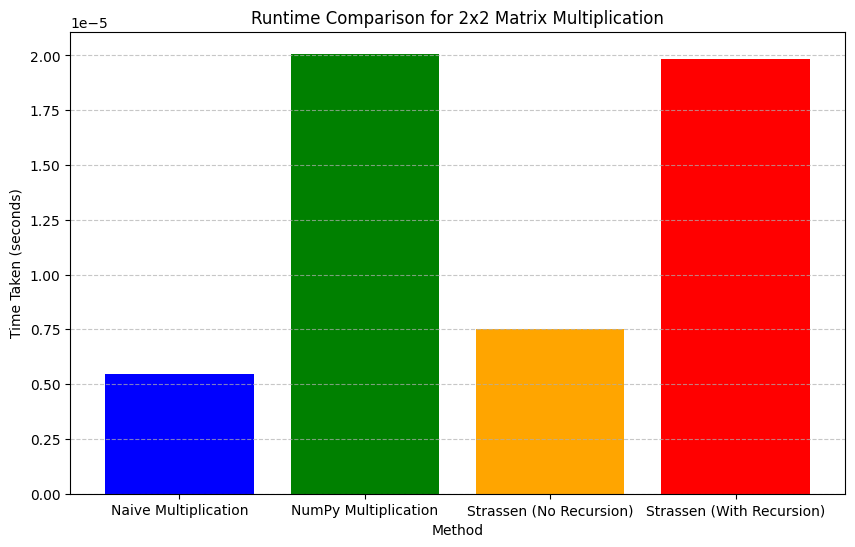

A= [[858, 8461], [33272, 1896792]]
B= [[64, 19], [56, 2]]
AxB= [[   528728     33224]
 [108349760   4425752]]


In [59]:
def time_plotter():
    naive_times = []
    numpy_times = []
    strassen_no_recursion_times = []
    strassen_with_recursion_times = []
    
    #to get a better result i runned this 40 times and took the average of all computations
    for i in range (40):
   
        A=[[random.randint(0, 100) for _ in range(2)] for _ in range(2)]
        B=[[random.randint(0, 100) for _ in range(2)] for _ in range(2)]

        start_time= time.time() #measures the time before the multiplication
        matrix_multiplication(A, B,2) #matrix multiplication 
        end_time = time.time() #measures the time after the multiplication
        runtime= end_time - start_time
        
        naive_times.append(runtime) #appends the naive_times with the time

        start_time= time.time() #measures the time before the multiplication
        C=np.dot(A, B) #matrix multiplication with numpy
        end_time = time.time() #measures the time after the multiplication
        runtime= end_time - start_time
        numpy_times.append(runtime) #appends the numpy_times with the time

        start_time= time.time() #measures the time before the multiplication
        strassen_No_recursion(A, B) #matrix multiplication strassen no recursion
        end_time = time.time() #measures the time after the multiplication
        runtime= end_time - start_time
        strassen_no_recursion_times.append(runtime) #appends the strassen_no_recursion_times with the time

        start_time= time.time() #measures the time before the multiplication
        strassen_with_recursion(A, B) #matrix multiplication with strassen and recursion
        end_time = time.time() #measures the time after the multiplication
        runtime= end_time - start_time
        strassen_with_recursion_times.append(runtime) #appends the strassen_with_recursion_times with the time


    # Methoden for the Legende
    methods = [
        "Naive Multiplication",
        "NumPy Multiplication",
        "Strassen (No Recursion)",
        "Strassen (With Recursion)"
    ]
    # calculate the average for every list
    avr_nat= sum(naive_times)/40
    avr_nut= sum(numpy_times)/40
    avr_snr= sum(strassen_no_recursion_times)/40
    avr_swrt= sum(strassen_with_recursion_times)/40

    print(f'runtime naive multiplication: {avr_nat}')
    print(f'runtime numpy multiplication: {avr_nut}')
    print(f'runtime strassen (no recursion) multiplication: {avr_snr}')
    print(f'runtime strassen (recursion) multiplication: {avr_swrt}')
    
    #save all average times in a list
    time_list= [avr_nat, avr_nut, avr_snr, avr_swrt]

    # Balkendiagramm
    plt.figure(figsize=(10, 6))
    plt.bar(methods, time_list, color=["blue", "green", "orange", "red"]) #for every multiplication it takes the average time and a colour
    plt.xlabel("Method") 
    plt.ylabel("Time Taken (seconds)")
    plt.title("Runtime Comparison for 2x2 Matrix Multiplication")
    plt.grid(axis="y", linestyle="--", alpha=0.7) #for the grid on the y axis, the linestyle and the transparence of the grid
    plt.show()

    print(f'A= {A}')
    print(f'B= {B}')
    print(f'AxB= {C}')


time_plotter() #call the function 

Comparison Strassen algorithmus (with and without recursion), my naive approach and my implementation with NumPy.

We obtain the following output: 
Matrix A= [[48, 10], [7, 41]]
Matrix B= [[55, 60], [38, 49]]
Matrix C= [[-5210, 11896], [-169, 14267]]
Time without recursion: 0.00011396408081054688 
Time with recursion: 0.0002818107604980469

We can see, that the strassen algorithmus with the recursion, takes a littel more time than with recursion- about 2 times more. This value varies depending on the value of the elements, that are choosen randomly. In the next diagramm we can see a better aproximation of the runtimes. 

If we look at the diagramm "Runtime Comparison for 2x2 Matrix Multiplication", we obtain about the same as we obtained for the runtime values in the strassen algorithm: The values varies depending on the value of the elements. So everytime we run the code we get an other diagramm, but the values ​​are always approximately in the same ratio.

- The NumPi multiplication takes the most time from the four multiplication: Around 2 x 10^(-5). In the other diagramm we obtained, that the Numpy multiplication takes much less time than my naiv multiplication for 50x50 matrices up to 400x400 matrices. This is unusual because numpy optimized. The fact that we used a small matrix, 
- The naiv multiplication is faster than the strassen algorithm and numpy (about 3 times faster than numpy and strassen algorithm with recursion). This comes, because it has fewer opeations than strassen algorithm  
- The recursion method in strassen algorithm takes more time than the method without. This follows, because it has to check less conditions than without the recursion. 

In conclusion, we can see a difference in the different methods and also in the different size of the matrices. 


Sources:

I used my knowledge from the lecture and the following sources: 
https://matplotlib.org/stable/users/index.html
https://docs.python.org/3/ 
https://de.wikipedia.org/wiki/Strassen-Algorithmus

